In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [16]:
data = pd.read_csv(r"Retentions_test\mem5_retention_test.csv")
data.head()

,time,R
0,1.109657,1.618422
1,3.226761,1.698206
2,5.333683,1.770883
3,7.432937,1.763882
4,9.531383,1.753356


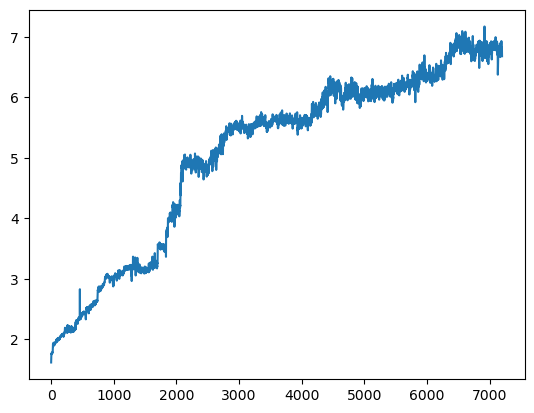

In [17]:
plt.plot(data.time,data.R)

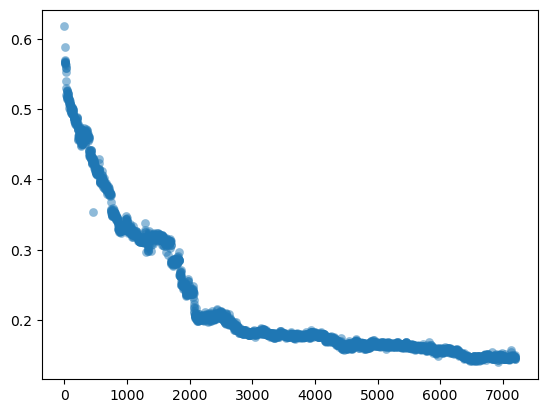

In [23]:
data["G"] = 1/data.R
plt.scatter(data.time,data.G,linewidths=0.2,alpha=0.5)